In [354]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np
%matplotlib inline
plt.rcParams.update({'font.size': 18})

In [318]:
#path = '../AfricaModels2022/Table/Lake_drop_restart_71_1000m_depth_meltf_FD_plot_135_to_203_dt2depthf20.txt'
#path = '../AfricaModels2022/Table/Lake_drop_restart_71_1000m_depth_meltf_FD_plot_135_to_203_dt1depthf30.txt'
path = '../AfricaModels2022/Table/Lake_drop_restart_71_1000m_depth_meltf_FD_plot_135_to_203_dt1depthf40.txt'
#path = '../AfricaModels2022/Table/Lake_drop_restart_71_1000m_depth_meltf_FD_plot_135_to_203_dt2depthf40.txt'
#path = '../AfricaModels2022/Table/Lake_drop_restart_71_1000m_depth_meltf_FD_plot_135_to_203_dt1depthf50.txt'
#path = '../AfricaModels2022/Table/Lake_drop_restart_71_1000m_depth_meltf_FD_plot_135_to_203_dt2depthf30.txt'
#path = '../AfricaModels2022/Table/Lake_drop_restart_71_1000m_depth_meltf_135_to_203_dt2depthf20.txt'
df = pd.read_csv(path)
interval = int(path.split('dt')[1][0])
freq = int(path.split('depthf')[1][0:2]) 
#df.describe()
# time: kyr
# depth:km
# mf_diff:%
#t = [step_b: int: step_e];
t= np.arange (135, 203+1, interval).tolist()
#  depth = linspace(20, maxdepth, nfreq+1);
depth = np.linspace(0, 100, freq+1)
# convert
# xv = np.linspace(min(t), max(t), len(t));
# yv = np.linspace(min(depth), max(depth), len(depth));
# [Xm,Ym] = np.meshgrid(xv, yv);
# #Zm = griddata((df['time'], df['depth']), df['mf_diff'], (Xm, Ym));
# Zm = griddata((df['time'], df['depth']), df['mf_diff'], (Xm, Ym), method = 'cubic');
# dt = interval*5e3; # time difference in year
# fig, ax = plt.subplots(figsize=(12, 5))
# plt.contourf([(x-min(t))*5 for x in Xm], Ym, Zm)
# ax.invert_yaxis()
# plt.ylim([70, 30])
# plt.colorbar()

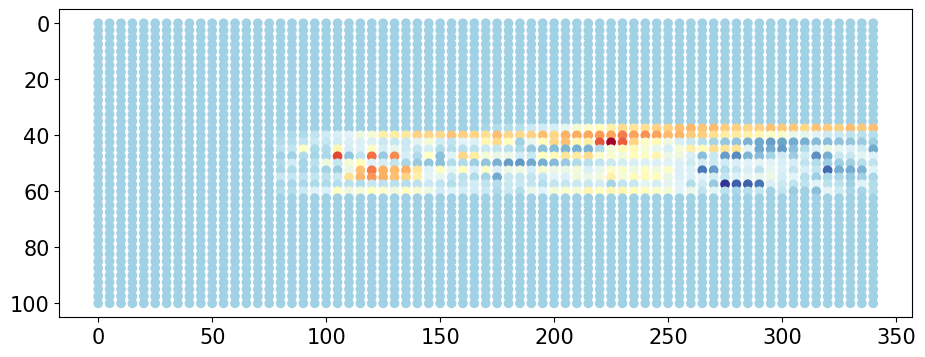

In [319]:
fig, ax = plt.subplots(figsize=(11, 4))
plt.scatter(df['time'], df['depth'], c = df['mf_diff'], cmap= 'RdYlBu_r')
ax.invert_yaxis()

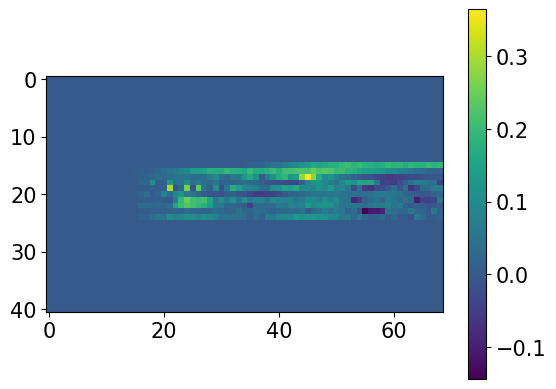

In [320]:
#Convert the DataFrame to a 2D array
mf_2d = df.pivot(index='depth', columns='time', values='mf_diff').values
plt.imshow(mf_2d)
plt.colorbar()


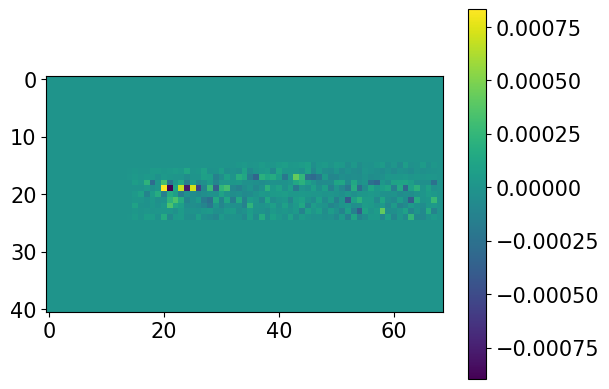

In [339]:
Zm = mf_2d
Z_rate = np.zeros([Zm.shape[0], Zm.shape[1]]) ;

for i in range(1,Zm.shape[1]-1):
    #print (i)# x
    for j in range(0,Zm.shape[0]-1):
        #print ('y', j)# y
        Z_rate[j,i] = 1e-2*2900*(Zm[j,i+1]-Zm[j,i])/(1*dt)  # rho*df/dt  kgm^-3*^-yr note the zm is in % 
        #Z_rate[j,i] = (Zm[j,i+1]-Zm[j,i-1])/(2*dt)
plt.imshow(Z_rate)
plt.colorbar()

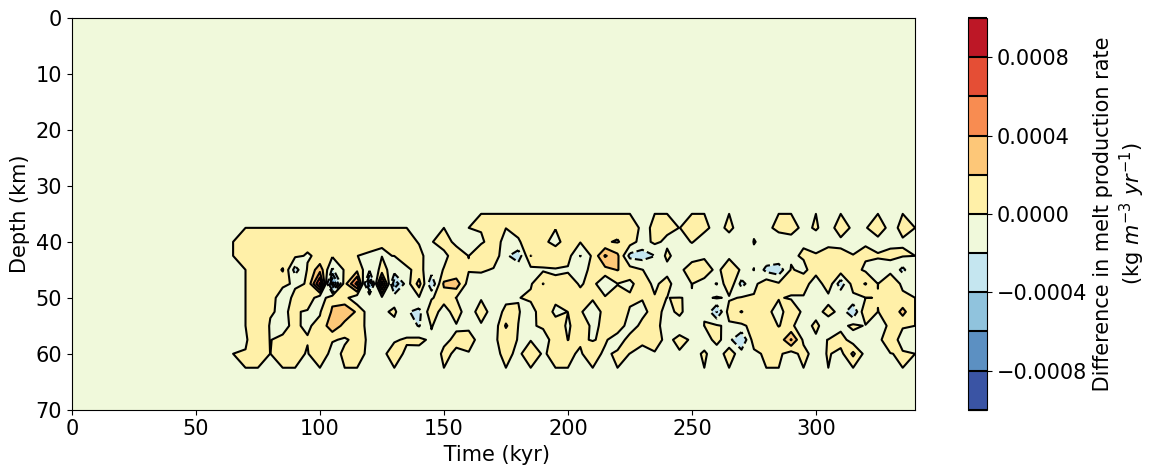

In [340]:
#  two lake level lows: 110kyr 220 kyr
fig, ax = plt.subplots(figsize=(12, 5))
ax1 = plt.contourf([(x-min(t))*5 for x in t],depth, Z_rate, levels = 10, cmap= 'RdYlBu_r')
ax2 = plt.contour([(x-min(t))*5 for x in t],depth, Z_rate, levels = 10, colors= 'k')
bar = plt.colorbar(ax1, label=" Difference in melt production rate \n(kg $m^{-3}$ $yr^{-1}$)")
bar.add_lines(ax2)
ax.invert_yaxis()
ax.set_ylabel('Depth (km)')
ax.set_xlabel(' Time (kyr)')
plt.ylim([70, 0])
plt.tight_layout()
plt.savefig('../AfricaModels2022/Figure/extraction/melt_production_dt{}_depthfreq{}.jpg'.format(interval, freq))

/tmp/ipykernel_914206/95399595.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Z_s = sp.ndimage.filters.gaussian_filter(Z_rate, sigma, mode='constant')
/tmp/ipykernel_914206/95399595.py:9: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax2 = plt.contour([(x-min(t))*5 for x in t],depth, Z_s, levels =15,


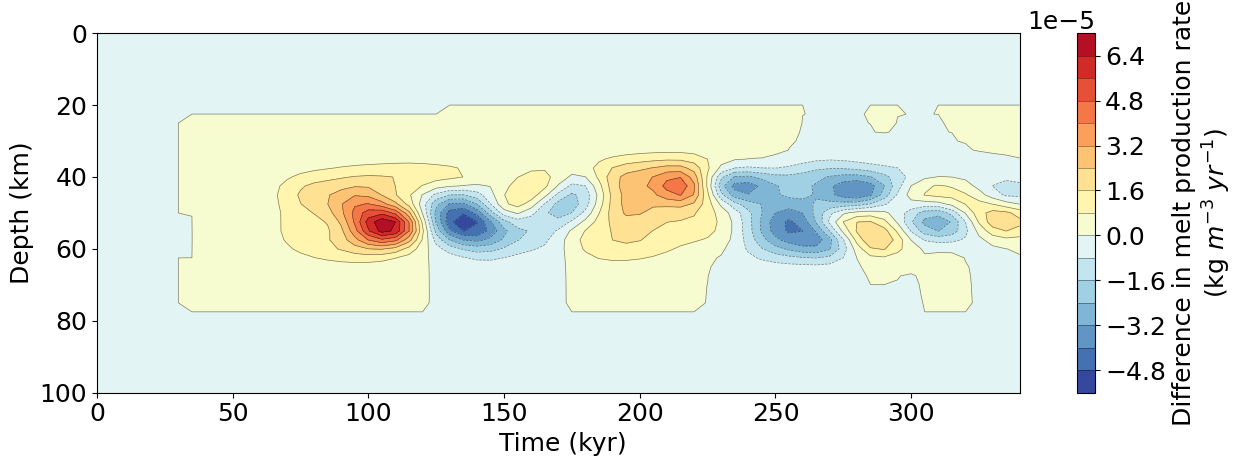

In [355]:
import scipy as sp
import scipy.ndimage
sigma = [1.4,1.8]
Z_s = sp.ndimage.filters.gaussian_filter(Z_rate, sigma, mode='constant')

#  two lake level lows: 110kyr 220 kyr
fig, ax = plt.subplots(figsize=(13, 5))
ax1 = plt.contourf([(x-min(t))*5 for x in t],depth, Z_s, levels = 15, cmap= 'RdYlBu_r')
ax2 = plt.contour([(x-min(t))*5 for x in t],depth, Z_s, levels =15,
                  linewidths=0.5, colors= 'k', alpha =0.5, linestyle = '--')
bar = plt.colorbar(ax1, label=" Difference in melt production rate \n(kg $m^{-3}$ $yr^{-1}$)")
bar.add_lines(ax2)
ax.invert_yaxis()
ax.set_ylabel('Depth (km)')
ax.set_xlabel(' Time (kyr)')
plt.ylim([100, 0])
plt.tight_layout()
plt.savefig('../AfricaModels2022/Figure/extraction/melt_production_dt{}_depthfreq{}_smooth.jpg'.
            format(interval, freq))

In [342]:
Zm.shape

(41, 69)

In [364]:
7.9e21/(74e9*3600*365.25*24)

3382.917482849037

In [365]:
3383*500/1e3

1691.5